In [2]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [4]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
query = '''select DISTINCT f.title, f.rental_rate, f.rating, f.rental_duration, f.length, f.replacement_cost, case when month(rental_date) = 8 then 1 else null end as rented_in_august
from sakila.rental r
join sakila.inventory i
on i.inventory_id = r.inventory_id
join sakila.film f
on i.film_id = f.film_id
where year(rental_date) = 2005'''

film_data = pd.read_sql_query(query, engine)
film_data.head(10)

,title,rental_rate,rating,rental_duration,length,replacement_cost,rented_in_august
0,ACADEMY DINOSAUR,0.99,PG,6,86,20.99,NaN
1,ACADEMY DINOSAUR,0.99,PG,6,86,20.99,1.0
2,ACE GOLDFINGER,4.99,G,3,48,12.99,1.0
3,ACE GOLDFINGER,4.99,G,3,48,12.99,NaN
4,ADAPTATION HOLES,2.99,NC-17,7,50,18.99,NaN
5,ADAPTATION HOLES,2.99,NC-17,7,50,18.99,1.0
6,AFFAIR PREJUDICE,2.99,G,5,117,26.99,NaN
7,AFFAIR PREJUDICE,2.99,G,5,117,26.99,1.0
8,AFRICAN EGG,2.99,G,6,130,22.99,NaN
9,AFRICAN EGG,2.99,G,6,130,22.99,1.0


In [5]:
film_data.dtypes

title                object
rental_rate         float64
rating               object
rental_duration       int64
length                int64
replacement_cost    float64
rented_in_august    float64
dtype: object

In [6]:
film_data.isna().sum()

title                 0
rental_rate           0
rating                0
rental_duration       0
length                0
replacement_cost      0
rented_in_august    958
dtype: int64

In [7]:
film_data = film_data.fillna(0)

In [8]:
film_data = film_data.drop('title', axis=1)

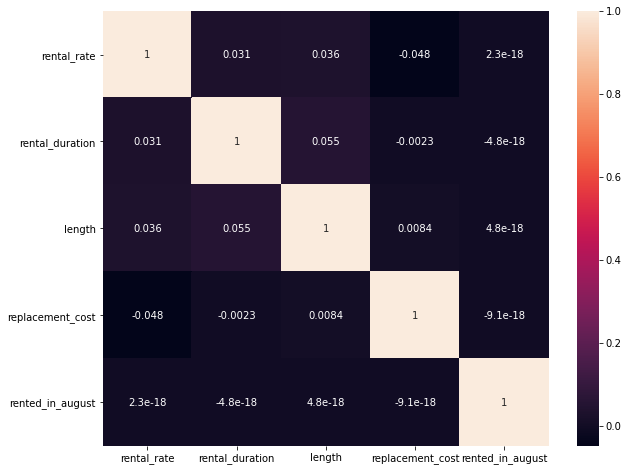

In [9]:
corr_matrix=film_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
film_data.head(10)

,rental_rate,rating,rental_duration,length,replacement_cost,rented_in_august
0,0.99,PG,6,86,20.99,0.0
1,0.99,PG,6,86,20.99,1.0
2,4.99,G,3,48,12.99,1.0
3,4.99,G,3,48,12.99,0.0
4,2.99,NC-17,7,50,18.99,0.0
5,2.99,NC-17,7,50,18.99,1.0
6,2.99,G,5,117,26.99,0.0
7,2.99,G,5,117,26.99,1.0
8,2.99,G,6,130,22.99,0.0
9,2.99,G,6,130,22.99,1.0


In [11]:
film_data.dtypes

rental_rate         float64
rating               object
rental_duration       int64
length                int64
replacement_cost    float64
rented_in_august    float64
dtype: object

In [12]:
# data['duration'] = data['duration'].astype('object')
film_data['rental_duration'] = film_data['rental_duration'].astype('object')

In [13]:
# X-y Split
y = film_data['rented_in_august']
X = film_data.drop('rented_in_august', axis=1)

In [14]:
X.head(10)

,rental_rate,rating,rental_duration,length,replacement_cost
0,0.99,PG,6,86,20.99
1,0.99,PG,6,86,20.99
2,4.99,G,3,48,12.99
3,4.99,G,3,48,12.99
4,2.99,NC-17,7,50,18.99
5,2.99,NC-17,7,50,18.99
6,2.99,G,5,117,26.99
7,2.99,G,5,117,26.99
8,2.99,G,6,130,22.99
9,2.99,G,6,130,22.99


In [15]:
# Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [16]:
X_train_num = X_train.select_dtypes(include = np.number)



In [17]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) 
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [18]:
X_train_norm.head(10)

,0,1,2
0,0.5,0.553957,0.60
1,0.5,0.568345,0.65
2,1.0,0.215827,0.20
3,0.5,0.553957,0.85
4,1.0,0.683453,0.65
5,0.5,0.769784,0.20
6,1.0,0.014388,0.15
7,1.0,0.251799,1.00
8,1.0,0.381295,0.10
9,0.0,0.683453,0.40


In [19]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_rate,length,replacement_cost
0,0.5,0.553957,0.60
1,0.5,0.568345,0.65
2,1.0,0.215827,0.20
3,0.5,0.553957,0.85
4,1.0,0.683453,0.65


In [20]:
X_train_categorical = X_train.select_dtypes(include = np.object)

<ipython-input-20-01f3156a623f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


In [21]:
X_train_categorical.head(10)

,rating,rental_duration
1795,NC-17,3
667,NC-17,6
765,NC-17,6
1071,NC-17,6
1583,NC-17,5
1414,PG-13,5
3,G,3
414,G,7
1443,PG,5
432,PG,3


In [24]:
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'rental_duration'],
                             drop_first=True)

In [25]:
X_train_cat.head(10)

,rating_NC-17,rating_PG,rating_PG-13,rating_R,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7
1795,1,0,0,0,0,0,0,0
667,1,0,0,0,0,0,1,0
765,1,0,0,0,0,0,1,0
1071,1,0,0,0,0,0,1,0
1583,1,0,0,0,0,1,0,0
1414,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,1
1443,0,1,0,0,0,1,0,0
432,0,1,0,0,0,0,0,0


In [26]:
# Merging num and cat frame
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [27]:
classification = LogisticRegression(random_state=27, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [28]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [33]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating','rental_duration'],
                            drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each original column seperately with one_hot_encoder

X_test_cat.head()

<ipython-input-33-1e1c8c9e364c>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


[('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('rental_duration_4', 'rental_duration_4'),
 ('rental_duration_5', 'rental_duration_5'),
 ('rental_duration_6', 'rental_duration_6'),
 ('rental_duration_7', 'rental_duration_7')]

,rating_NC-17,rating_PG,rating_PG-13,rating_R,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7
688,0,0,0,1,1,0,0,0
117,0,0,1,0,0,0,1,0
1576,1,0,0,0,1,0,0,0
1900,0,0,1,0,0,0,1,0
849,0,0,1,0,0,0,0,0


In [34]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [35]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.4192708333333333

In [27]:
# Horrible Model

0.0    196
1.0    188
Name: rented_in_august, dtype: int64
